In [1]:
import torch
import matplotlib.pyplot as plt


In [8]:
train_log = torch.load('train_log.pt')
valid_log = torch.load('valid_log.pt')

In [10]:
T_list = [10, 20, 40, 60, 80, 100, 200, 300, 400, 500]
B_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_trials = 50
n_epochs = 1000
train_tensor = torch.zeros(len(T_list), len(B_list), n_trials, 2)
valid_tensor = torch.zeros(len(T_list), len(B_list), n_trials, 2)
for i, T in enumerate(T_list):
    for j, B_t in enumerate(B_list):
        for t in range(n_trials):
            t_loss, t_acc = train_log[f"{T}_{B_t}"][t]
            v_loss, v_acc = valid_log[f"{T}_{B_t}"][t]
            train_tensor[i, j, t, 0] = t_loss[-1]
            train_tensor[i, j, t, 1] = t_acc[-1]
            valid_tensor[i, j, t, 0] = v_loss[-1]
            valid_tensor[i, j, t, 1] = v_acc[-1]


In [40]:
t_grid = torch.quantile(valid_tensor[:, :, :, 1], 0.5, dim=2)

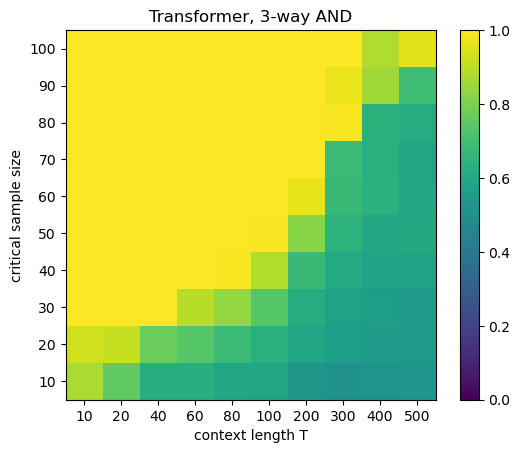

In [41]:
plt.figure()
plt.title("Transformer, 3-way AND")
plt.imshow(t_grid.T, origin='lower', vmin=0.0, vmax=1.0, cmap='viridis')
plt.yticks(range(len(B_list)), B_list)
plt.xticks(range(len(T_list)), T_list)
plt.xlabel('context length T')
plt.ylabel('critical sample size')
plt.colorbar()
plt.show()

In [48]:
valid_fin_tensor = (valid_tensor[..., 1] > 0.99).sum(dim=2) * 2
valid_fin_tensor.shape

torch.Size([10, 10])

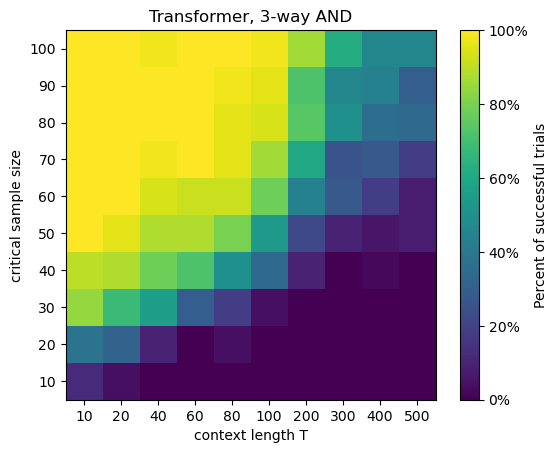

In [61]:
plt.figure()
plt.title("Transformer, 3-way AND")
plt.imshow(valid_fin_tensor.T, origin='lower', cmap='viridis')
plt.yticks(range(len(B_list)), B_list)
plt.xticks(range(len(T_list)), T_list)
plt.xlabel('context length T')
plt.ylabel('critical sample size')
# plt.colorbar()
cbar = plt.colorbar()
cbar.set_label('Percent of successful trials')
cbar.set_ticks(ticks=list(range(0, 101, 20)), labels=[f"{i*20}%" for i in range(6)])
plt.show()